<a href="https://colab.research.google.com/github/RajashreeDahal4/Customer-Segmentation/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import silhouette_score

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sa-customer-segmentation/flight_train.csv
/kaggle/input/sa-customer-segmentation/sample.csv
/kaggle/input/sa-customer-segmentation/flight_test.csv


In [ ]:
train_data=pd.read_csv('/kaggle/input/sa-customer-segmentation/flight_train.csv')
test_data=pd.read_csv('/kaggle/input/sa-customer-segmentation/flight_test.csv')
sample_data=pd.read_csv('/kaggle/input/sa-customer-segmentation/sample.csv')

In [ ]:
train_data.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55000 entries, 0 to 54999
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          55000 non-null  int64  
 1   FFP_DATE           55000 non-null  object 
 2   FIRST_FLIGHT_DATE  55000 non-null  object 
 3   GENDER             54997 non-null  object 
 4   FFP_TIER           55000 non-null  int64  
 5   WORK_CITY          53034 non-null  object 
 6   WORK_PROVINCE      52216 non-null  object 
 7   WORK_COUNTRY       54980 non-null  object 
 8   AGE                54658 non-null  float64
 9   LOAD_TIME          55000 non-null  object 
 10  FLIGHT_COUNT       55000 non-null  int64  
 11  BP_SUM             55000 non-null  int64  
 12  SUM_YR_1           54738 non-null  float64
 13  SUM_YR_2           54937 non-null  float64
 14  SEG_KM_SUM         55000 non-null  int64  
 15  LAST_FLIGHT_DATE   55000 non-null  object 
 16  LAST_TO_END        550

In [ ]:
train_data.isnull().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            1966
WORK_PROVINCE        2784
WORK_COUNTRY           20
AGE                   342
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              262
SUM_YR_2               63
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

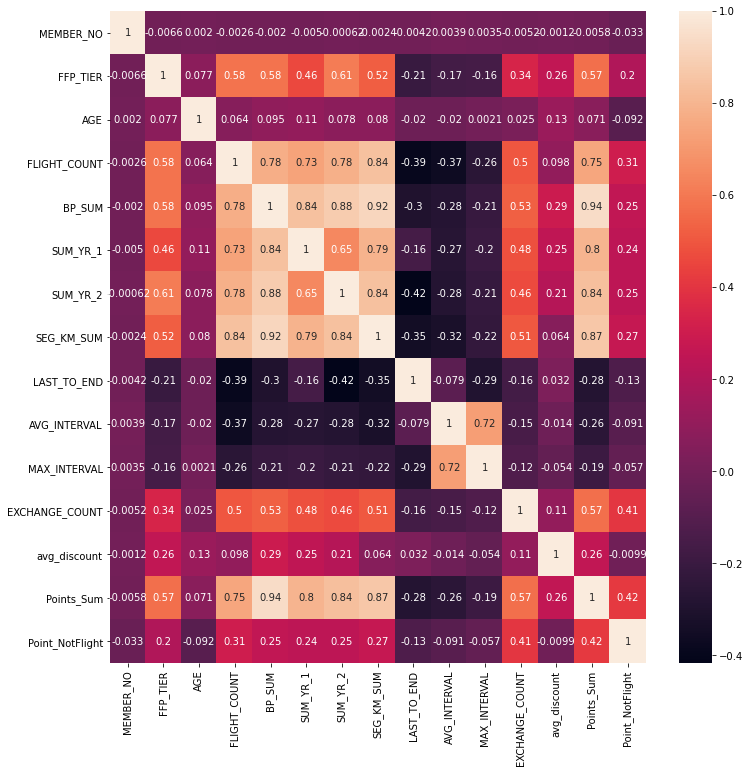

In [ ]:
plt.subplots(figsize=(12,12))
sns.heatmap(train_data.corr(),annot=True)

In [ ]:
train_data=train_data.append(test_data)

In [ ]:
train_data.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39
5,56972,2/10/2008,9/29/2009,Male,6,guangzhou,guangdong,CN,64.0,3/31/2014,...,76946.0,294585,1/13/2014,79,7.043956,52,10,0.967692,343121,15


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59752 entries, 0 to 7987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          59752 non-null  int64  
 1   FFP_DATE           59752 non-null  object 
 2   FIRST_FLIGHT_DATE  59752 non-null  object 
 3   GENDER             59749 non-null  object 
 4   FFP_TIER           59752 non-null  int64  
 5   WORK_CITY          59449 non-null  object 
 6   WORK_PROVINCE      59288 non-null  object 
 7   WORK_COUNTRY       59745 non-null  object 
 8   AGE                59752 non-null  float64
 9   LOAD_TIME          59752 non-null  object 
 10  FLIGHT_COUNT       59752 non-null  int64  
 11  BP_SUM             59752 non-null  int64  
 12  SUM_YR_1           59214 non-null  float64
 13  SUM_YR_2           59617 non-null  float64
 14  SEG_KM_SUM         59752 non-null  int64  
 15  LAST_FLIGHT_DATE   59752 non-null  object 
 16  LAST_TO_END        5975

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
imputer=SimpleImputer(missing_values=np.nan,strategy='median')
train_data=train_data[train_data['WORK_CITY'].notnull() & train_data['WORK_PROVINCE']]
age=imputer.fit(train_data[['AGE']])
train_data['AGE']=imputer.transform(train_data[['AGE']])
test_data['AGE']=imputer.transform(test_data[['AGE']])

In [ ]:
train_data.isnull().sum()

MEMBER_NO              0
FFP_DATE               0
FIRST_FLIGHT_DATE      0
GENDER                 3
FFP_TIER               0
WORK_CITY              0
WORK_PROVINCE          0
WORK_COUNTRY           1
AGE                    0
LOAD_TIME              0
FLIGHT_COUNT           0
BP_SUM                 0
SUM_YR_1             528
SUM_YR_2             134
SEG_KM_SUM             0
LAST_FLIGHT_DATE       0
LAST_TO_END            0
AVG_INTERVAL           0
MAX_INTERVAL           0
EXCHANGE_COUNT         0
avg_discount           0
Points_Sum             0
Point_NotFlight        0
dtype: int64

In [ ]:
mis_columns=['SUM_YR_1','SUM_YR_2']
def linear_regression_imputer(df,column):
    from sklearn.preprocessing import StandardScaler
    scalar=StandardScaler()
    df['BP_SUM']=scalar.fit_transform(df[['BP_SUM']])
    parameter='BP_SUM'
    lr.fit(df[df[column].notnull()][[parameter]],df[df[column].notnull()][[column]])
    return(lr.predict(df[df[column].isnull()][[parameter]]))
        

In [ ]:
df=train_data.copy()
for column in mis_columns:
    lr1=(linear_regression_imputer(df,column))
    l=len(lr1)
    train_data.loc[train_data[column].isnull(),column]=lr1.reshape((l,1))
    

In [ ]:
train_data.isnull().sum()

MEMBER_NO            0
FFP_DATE             0
FIRST_FLIGHT_DATE    0
GENDER               3
FFP_TIER             0
WORK_CITY            0
WORK_PROVINCE        0
WORK_COUNTRY         1
AGE                  0
LOAD_TIME            0
FLIGHT_COUNT         0
BP_SUM               0
SUM_YR_1             0
SUM_YR_2             0
SEG_KM_SUM           0
LAST_FLIGHT_DATE     0
LAST_TO_END          0
AVG_INTERVAL         0
MAX_INTERVAL         0
EXCHANGE_COUNT       0
avg_discount         0
Points_Sum           0
Point_NotFlight      0
dtype: int64

In [ ]:
train_data.nunique().sort_values(ascending=False )

MEMBER_NO            59240
avg_discount         51115
SEG_KM_SUM           28215
Points_Sum           24382
BP_SUM               22793
SUM_YR_2             16464
SUM_YR_1             15593
AVG_INTERVAL         10552
FIRST_FLIGHT_DATE     3400
FFP_DATE              3063
WORK_CITY             2976
WORK_PROVINCE         1139
LAST_FLIGHT_DATE       731
LAST_TO_END            731
MAX_INTERVAL           706
FLIGHT_COUNT           151
WORK_COUNTRY           106
Point_NotFlight         99
AGE                     83
EXCHANGE_COUNT          27
FFP_TIER                 3
GENDER                   2
LOAD_TIME                1
dtype: int64

In [ ]:
train_data['GENDER'].unique()

array(['Male', 'Female', nan], dtype=object)

Male      45144
Female    14093
Name: GENDER, dtype: int64


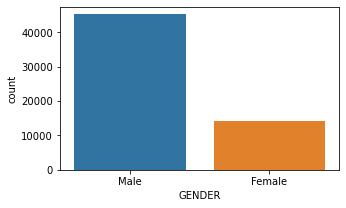

In [ ]:
print(train_data['GENDER'].value_counts())
f,ax=plt.subplots(1,1)
f.set_size_inches(5,3)
sns.countplot(train_data["GENDER"], ax=ax)

Here, observing the above chart, we can find that distribution of Male is way higher than that of female. So, we replace the missing gender null values with male in the test data.However,train data has no null values for gender.

In [ ]:
train_data["GENDER"].fillna("Male",inplace=True)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59240 entries, 0 to 7987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          59240 non-null  int64  
 1   FFP_DATE           59240 non-null  object 
 2   FIRST_FLIGHT_DATE  59240 non-null  object 
 3   GENDER             59240 non-null  object 
 4   FFP_TIER           59240 non-null  int64  
 5   WORK_CITY          59240 non-null  object 
 6   WORK_PROVINCE      59240 non-null  object 
 7   WORK_COUNTRY       59239 non-null  object 
 8   AGE                59240 non-null  float64
 9   LOAD_TIME          59240 non-null  object 
 10  FLIGHT_COUNT       59240 non-null  int64  
 11  BP_SUM             59240 non-null  int64  
 12  SUM_YR_1           59240 non-null  float64
 13  SUM_YR_2           59240 non-null  float64
 14  SEG_KM_SUM         59240 non-null  int64  
 15  LAST_FLIGHT_DATE   59240 non-null  object 
 16  LAST_TO_END        5924

In [ ]:
train_data['WORK_COUNTRY'].unique()

array(['CN', 'US', 'FR', 'AN', 'JP', 'HK', 'MY', 'NL', 'AU', 'CA', 'KR',
       'PK', 'SG', 'BR', 'PE', 'HN', 'PH', 'GN', 'FL', 'MO', 'TW', 'VN',
       'DE', 'IL', 'CH', 'ID', 'KH', 'VT', 'TH', 'EC', 'NG', 'BI', 'BE',
       'GL', 'NZ', 'MX', 'FA', 'NI', 'KO', 'CC', 'UV', 'MN', 'UK', 'AS',
       'IT', 'AE', 'IN', 'NO', 'MS', 'UZ', 'NE', 'AT', 'HU', 'EG', '中',
       'AA', 'ES', 'MZ', 'SW', 'PS', 'KE', 'KZ', 'SE', 'SN', 'BB', 'UA',
       'MA', 'YE', 'GE', 'SI', 'CY', 'KA', 'RO', 'DK', 'AB', 'CD', 'UY',
       'CM', 'TK', 'IR', 'AR', 'BN', 'MV', 'PN', '北', 'SU', 'RU', '沈',
       'GU', 'GB', 'PP', nan, '芬', 'FO', 'IE', 'PR', 'AZ', 'GH', 'ZA',
       'IA', 'cn', 'TR', 'LA', 'BG', 'CL', 'CR', 'SA'], dtype=object)

In [ ]:
customer_countrytrain=train_data[['WORK_COUNTRY','MEMBER_NO']]

In [ ]:
customer_countrytrain.groupby(['WORK_COUNTRY']).agg('count').reset_index().sort_values('MEMBER_NO', ascending=False)

,WORK_COUNTRY,MEMBER_NO
21,CN,55895
49,JP,720
54,KR,720
93,US,489
39,HK,373
...,...,...
57,MA,1
58,MN,1
60,MS,1
61,MV,1


From the above table, we can find that more than 94% of the customers in the data are from China.There is also some research that customer clusters vary by geography, so here we will restrict the data to China, Japan,Korea , United States and Honkong which covers more than 98% of the data.

In [ ]:
list=['CN','JP','KR','US','HK']
train_data = train_data.loc[train_data.WORK_COUNTRY.isin(list)] 


In [ ]:

train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58197 entries, 0 to 7987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          58197 non-null  int64  
 1   FFP_DATE           58197 non-null  object 
 2   FIRST_FLIGHT_DATE  58197 non-null  object 
 3   GENDER             58197 non-null  object 
 4   FFP_TIER           58197 non-null  int64  
 5   WORK_CITY          58197 non-null  object 
 6   WORK_PROVINCE      58197 non-null  object 
 7   WORK_COUNTRY       58197 non-null  object 
 8   AGE                58197 non-null  float64
 9   LOAD_TIME          58197 non-null  object 
 10  FLIGHT_COUNT       58197 non-null  int64  
 11  BP_SUM             58197 non-null  int64  
 12  SUM_YR_1           58197 non-null  float64
 13  SUM_YR_2           58197 non-null  float64
 14  SEG_KM_SUM         58197 non-null  int64  
 15  LAST_FLIGHT_DATE   58197 non-null  object 
 16  LAST_TO_END        5819

In [ ]:
train_data.WORK_PROVINCE.nunique()

744

Now, we check unique values for each column

In [ ]:
def unique_counts(train_data):
    for i in train_data.columns:
        count = train_data[i].nunique()
        print(i, ": ", count)
unique_counts(train_data)

MEMBER_NO :  58197
FFP_DATE :  3063
FIRST_FLIGHT_DATE :  3400
GENDER :  2
FFP_TIER :  3
WORK_CITY :  2420
WORK_PROVINCE :  744
WORK_COUNTRY :  5
AGE :  83
LOAD_TIME :  1
FLIGHT_COUNT :  151
BP_SUM :  22576
SUM_YR_1 :  15468
SUM_YR_2 :  16319
SEG_KM_SUM :  27915
LAST_FLIGHT_DATE :  731
LAST_TO_END :  731
AVG_INTERVAL :  10522
MAX_INTERVAL :  706
EXCHANGE_COUNT :  26
avg_discount :  50294
Points_Sum :  24161
Point_NotFlight :  98


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58197 entries, 0 to 7987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          58197 non-null  int64  
 1   FFP_DATE           58197 non-null  object 
 2   FIRST_FLIGHT_DATE  58197 non-null  object 
 3   GENDER             58197 non-null  object 
 4   FFP_TIER           58197 non-null  int64  
 5   WORK_CITY          58197 non-null  object 
 6   WORK_PROVINCE      58197 non-null  object 
 7   WORK_COUNTRY       58197 non-null  object 
 8   AGE                58197 non-null  float64
 9   LOAD_TIME          58197 non-null  object 
 10  FLIGHT_COUNT       58197 non-null  int64  
 11  BP_SUM             58197 non-null  int64  
 12  SUM_YR_1           58197 non-null  float64
 13  SUM_YR_2           58197 non-null  float64
 14  SEG_KM_SUM         58197 non-null  int64  
 15  LAST_FLIGHT_DATE   58197 non-null  object 
 16  LAST_TO_END        5819

In [ ]:
train_data.describe()

Text(0, 0.5, 'count')

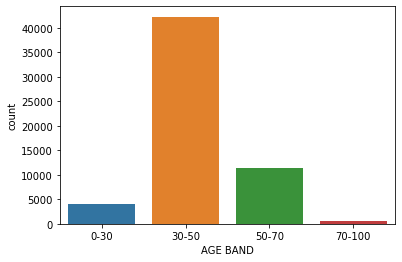

In [ ]:
age0_30=train_data.AGE[(train_data.AGE>=0) & (train_data.AGE<30)]
age30_50=train_data.AGE[(train_data.AGE>=30) & (train_data.AGE<50)]
age50_70=train_data.AGE[(train_data.AGE>=50) & (train_data.AGE<70)]
age70_100=train_data.AGE[(train_data.AGE>=70) & (train_data.AGE<100)]

y=[len(age0_30.values),len(age30_50.values),len(age50_70.values),len(age70_100.values)]
x=['0-30','30-50','50-70','70-100']
sns.barplot(x=x,y=y)
plt.xlabel('AGE BAND')
plt.ylabel('count')

Here, we find that majority of the customers are from the age group 30-50

so bringing out the features like the age of the customer in the company, Recency of the customer etc. from the given date features.

In [ ]:
train_data['FIRST_FLIGHT_DATE']=pd.to_datetime(train_data['FIRST_FLIGHT_DATE'],errors='coerce')
train_data['LAST_FLIGHT_DATE']=pd.to_datetime(train_data['LAST_FLIGHT_DATE'],errors='coerce')
train_data['LOAD_TIME']=pd.to_datetime(train_data['LOAD_TIME'],errors='coerce')
train_data['FFP_DATE']=pd.to_datetime(train_data['FFP_DATE'],errors='coerce')

train_data=train_data.loc[train_data['LAST_FLIGHT_DATE'].notnull()]

In [ ]:
train_data['Recurency']=(train_data['LOAD_TIME']-train_data['FIRST_FLIGHT_DATE']).dt.days
train_data['Days_old']=(train_data['LOAD_TIME']-train_data['LAST_FLIGHT_DATE']).dt.days
train_data['FFP_days']=(train_data['LOAD_TIME']-train_data['FFP_DATE']).dt.days

In [ ]:
train_data.info()
train_data.isnull().sum()
train_data.count()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57806 entries, 0 to 7987
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   MEMBER_NO          57806 non-null  int64         
 1   FFP_DATE           57806 non-null  datetime64[ns]
 2   FIRST_FLIGHT_DATE  57806 non-null  datetime64[ns]
 3   GENDER             57806 non-null  object        
 4   FFP_TIER           57806 non-null  int64         
 5   WORK_CITY          57806 non-null  object        
 6   WORK_PROVINCE      57806 non-null  object        
 7   WORK_COUNTRY       57806 non-null  object        
 8   AGE                57806 non-null  float64       
 9   LOAD_TIME          57806 non-null  datetime64[ns]
 10  FLIGHT_COUNT       57806 non-null  int64         
 11  BP_SUM             57806 non-null  int64         
 12  SUM_YR_1           57806 non-null  float64       
 13  SUM_YR_2           57806 non-null  float64       
 14  SEG_KM_

MEMBER_NO            57806
FFP_DATE             57806
FIRST_FLIGHT_DATE    57806
GENDER               57806
FFP_TIER             57806
WORK_CITY            57806
WORK_PROVINCE        57806
WORK_COUNTRY         57806
AGE                  57806
LOAD_TIME            57806
FLIGHT_COUNT         57806
BP_SUM               57806
SUM_YR_1             57806
SUM_YR_2             57806
SEG_KM_SUM           57806
LAST_FLIGHT_DATE     57806
LAST_TO_END          57806
AVG_INTERVAL         57806
MAX_INTERVAL         57806
EXCHANGE_COUNT       57806
avg_discount         57806
Points_Sum           57806
Point_NotFlight      57806
Recurency            57806
Days_old             57806
FFP_days             57806
dtype: int64

In [ ]:
train_data.drop(columns=['FFP_DATE','FIRST_FLIGHT_DATE','WORK_CITY','LOAD_TIME','LAST_FLIGHT_DATE'],inplace=True)


One hot encoding the data 

In [ ]:
train_data['GENDER'].replace(['Male','Female'],[1,0],inplace=True)


In [ ]:
train_data.head()

,MEMBER_NO,GENDER,FFP_TIER,WORK_PROVINCE,WORK_COUNTRY,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,...,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,Recurency,Days_old,FFP_days
0,54993,1,6,beijing,CN,31.0,210,505308,239560.0,234188.0,...,1,3.483254,18,34,0.961639,619760,50,1923,0,2706
2,55106,1,6,beijing,CN,40.0,135,351159,163618.0,164982.0,...,11,5.298507,18,20,1.254676,406361,26,2405,10,2615
3,21189,1,5,CA,US,64.0,23,337314,116350.0,125500.0,...,97,27.863636,73,11,1.090870,372204,12,2046,95,2047
4,39546,1,6,guizhou,CN,48.0,152,273844,124560.0,130702.0,...,5,4.788079,47,27,0.970658,338813,39,1811,4,1816
5,56972,1,6,guangdong,CN,64.0,92,313338,112364.0,76946.0,...,79,7.043956,52,10,0.967692,343121,15,1644,77,2241


In [ ]:

train_data=train_data.reset_index(drop=True)


In [ ]:
train_data.tail()

,MEMBER_NO,GENDER,FFP_TIER,WORK_PROVINCE,WORK_COUNTRY,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,...,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,Recurency,Days_old,FFP_days
57801,18375,0,4,guangdong,CN,25.0,2,0,0.000000,0.0,...,297,4.0,4,1,0.0,12318,22,299,295,1046
57802,36041,1,4,guangdong,CN,38.0,4,0,0.000000,0.0,...,89,37.0,60,14,0.0,106972,43,198,87,1484
57803,45690,0,4,guangdong,CN,43.0,2,0,0.000000,0.0,...,29,166.0,166,0,0.0,0,0,2676,28,2923
57804,61027,0,4,guangdong,CN,36.0,2,0,0.000000,0.0,...,400,12.0,12,0,0.0,0,0,410,398,418
57805,61340,0,4,.,CN,29.0,2,0,673.709279,0.0,...,403,6.0,6,0,0.0,0,0,407,401,407


In [ ]:
train_data=pd.get_dummies(train_data,columns=['WORK_COUNTRY'])
train_data=pd.get_dummies(train_data,columns=['FFP_TIER'])
train_data.head()


,MEMBER_NO,GENDER,WORK_PROVINCE,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,...,Days_old,FFP_days,WORK_COUNTRY_CN,WORK_COUNTRY_HK,WORK_COUNTRY_JP,WORK_COUNTRY_KR,WORK_COUNTRY_US,FFP_TIER_4,FFP_TIER_5,FFP_TIER_6
0,54993,1,beijing,31.0,210,505308,239560.0,234188.0,580717,1,...,0,2706,1,0,0,0,0,0,0,1
1,55106,1,beijing,40.0,135,351159,163618.0,164982.0,283712,11,...,10,2615,1,0,0,0,0,0,0,1
2,21189,1,CA,64.0,23,337314,116350.0,125500.0,281336,97,...,95,2047,0,0,0,0,1,0,1,0
3,39546,1,guizhou,48.0,152,273844,124560.0,130702.0,309928,5,...,4,1816,1,0,0,0,0,0,0,1
4,56972,1,guangdong,64.0,92,313338,112364.0,76946.0,294585,79,...,77,2241,1,0,0,0,0,0,0,1


In [ ]:
train_data=pd.get_dummies(train_data,columns=['WORK_PROVINCE'])

train_data.head()

,MEMBER_NO,GENDER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,...,WORK_PROVINCE_zhongqing,WORK_PROVINCE_zhongqingshi,WORK_PROVINCE_zhuhai,WORK_PROVINCE_——,WORK_PROVINCE_,WORK_PROVINCE_,WORK_PROVINCE_。,WORK_PROVINCE_shanxian,WORK_PROVINCE_－,WORK_PROVINCE_．
0,54993,1,31.0,210,505308,239560.0,234188.0,580717,1,3.483254,...,0,0,0,0,0,0,0,0,0,0
1,55106,1,40.0,135,351159,163618.0,164982.0,283712,11,5.298507,...,0,0,0,0,0,0,0,0,0,0
2,21189,1,64.0,23,337314,116350.0,125500.0,281336,97,27.863636,...,0,0,0,0,0,0,0,0,0,0
3,39546,1,48.0,152,273844,124560.0,130702.0,309928,5,4.788079,...,0,0,0,0,0,0,0,0,0,0
4,56972,1,64.0,92,313338,112364.0,76946.0,294585,79,7.043956,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_id=train_data['MEMBER_NO'].copy()
train_data.drop(['MEMBER_NO'],axis=1,inplace=True)
train_data.head()

,GENDER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,...,WORK_PROVINCE_zhongqing,WORK_PROVINCE_zhongqingshi,WORK_PROVINCE_zhuhai,WORK_PROVINCE_——,WORK_PROVINCE_,WORK_PROVINCE_,WORK_PROVINCE_。,WORK_PROVINCE_shanxian,WORK_PROVINCE_－,WORK_PROVINCE_．
0,1,31.0,210,505308,239560.0,234188.0,580717,1,3.483254,18,...,0,0,0,0,0,0,0,0,0,0
1,1,40.0,135,351159,163618.0,164982.0,283712,11,5.298507,18,...,0,0,0,0,0,0,0,0,0,0
2,1,64.0,23,337314,116350.0,125500.0,281336,97,27.863636,73,...,0,0,0,0,0,0,0,0,0,0
3,1,48.0,152,273844,124560.0,130702.0,309928,5,4.788079,47,...,0,0,0,0,0,0,0,0,0,0
4,1,64.0,92,313338,112364.0,76946.0,294585,79,7.043956,52,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_id

0        54993
1        55106
2        21189
3        39546
4        56972
         ...  
57801    18375
57802    36041
57803    45690
57804    61027
57805    61340
Name: MEMBER_NO, Length: 57806, dtype: int64

lets start some ML now 
since we are using unsupervised learning 
we would be usinng
1. k means and 
2. k means mini batch 


scoring we would be using is 
*  Silhouette score

Higher the score means more well defined is the cluster

normalization of the data

In [ ]:
def normalization(df):
    from sklearn.preprocessing import StandardScaler
    columns_name=df.columns
    scaler=StandardScaler()
    X=scaler.fit_transform(df)
    df=pd.DataFrame(X)
    df.columns=columns_name
    return df


PCA decomposition 

In [ ]:
def pca_decomposition(df,num):
    pca_data=df.copy()
    from sklearn.decomposition import PCA
    decompose=PCA(n_components=num,copy=True, 
          whiten=False, 
          svd_solver='auto', 
          tol=0.0, 
          iterated_power='auto', 
          random_state=0)
    decompose.fit(pca_data)
    trans_pca = decompose.transform(pca_data)
    df_pca = pd.DataFrame(trans_pca)
    variance_ratio = decompose.explained_variance_ratio_
    print('pca_components ',num,'   describe ',sum(variance_ratio))
    return df_pca,sum(variance_ratio)

k means algorithm

In [ ]:

def train_kmeans(x, k):
    KMModel = KMeans(n_clusters=k, 
                     init='k-means++', 
                     n_init=10, 
                     max_iter=600, 
                     tol=0.0001, 
                     precompute_distances='auto', 
                     verbose=0, 
                     random_state=1, 
                     copy_x=True, 
                     n_jobs=1, 
                     algorithm='auto')
    KMModel.fit(x) 
    print("kmeans,", k, "clusters:   ", "silhouette_score", silhouette_score(x, KMModel.labels_),'\n' )
    return KMModel

In [ ]:
from sklearn.cluster import KMeans


In [ ]:
train_normalize=normalization(train_data)



In [ ]:
from sklearn.decomposition import PCA

In [ ]:

alist=[]
dim=[]
vari=[]
for l in range(150,600,20):
    pca_result,var=pca_decomposition(train_normalize,l)
    alist.append(pca_result)
    vari.append(var)
    dim.append(l)
    
    

pca_components  150    describe  0.21465202137549777
pca_components  170    describe  0.24080534315128116
pca_components  190    describe  0.2669821746255979
pca_components  210    describe  0.29312504766137254
pca_components  230    describe  0.3192550448460118
pca_components  250    describe  0.3453972632711727
pca_components  270    describe  0.3715121080684595
pca_components  290    describe  0.3976563728300036
pca_components  310    describe  0.4237947004111533
pca_components  330    describe  0.4498996001745935
pca_components  350    describe  0.47602302790486556
pca_components  370    describe  0.5021473106642457
pca_components  390    describe  0.5282667844494561
pca_components  410    describe  0.5543983545290629
pca_components  430    describe  0.5804888849833499
pca_components  450    describe  0.6066164866085926
pca_components  470    describe  0.6327193328736124
pca_components  490    describe  0.6588268495921724
pca_components  510    describe  0.6849321294827239
pca_comp

Text(0, 0.5, 'Cumulative explained variance')

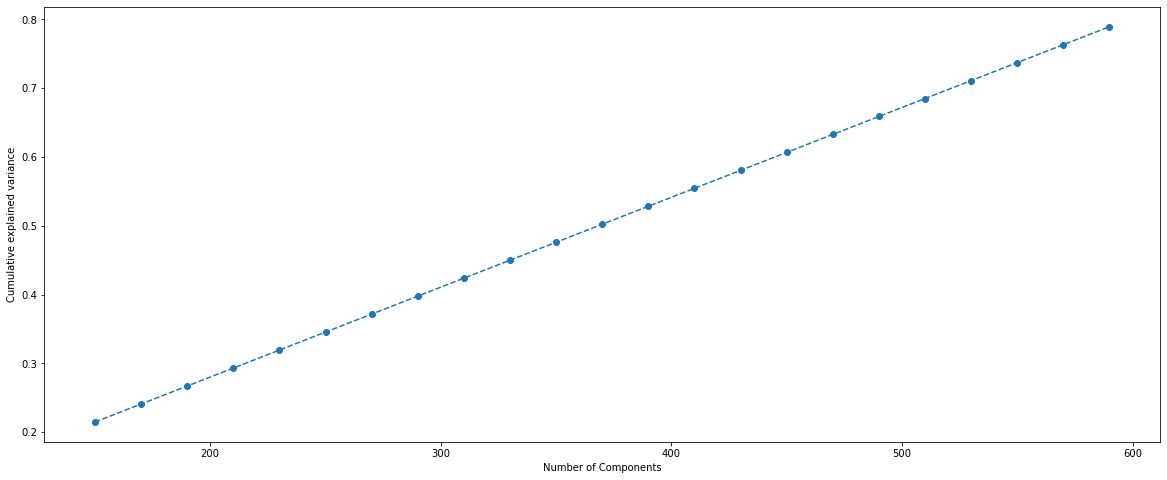

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(dim,vari,marker='o',linestyle='--')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative explained variance")

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
from sklearn.metrics import silhouette_score
df=train_normalize.copy()
for pca in [300,450,500,400]:
    df=train_normalize.copy()
    pca_df,vari=pca_decomposition(df,pca)
    for cluster in [2,3,4]:
        train_kmeans(pca_df,cluster)

pca_components  300    describe  0.41073241660587767


/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:934: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  "effect", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


kmeans, 2 clusters:    silhouette_score 0.25131879575875643 



/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:934: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  "effect", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


kmeans, 3 clusters:    silhouette_score 0.25138746706342074 



/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:934: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  "effect", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


kmeans, 4 clusters:    silhouette_score 0.2879558484700659 

pca_components  450    describe  0.6066164866085926


/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:934: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  "effect", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


kmeans, 2 clusters:    silhouette_score 0.73475452321929 



/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:934: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  "effect", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


kmeans, 3 clusters:    silhouette_score 0.22411811971744702 



/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:934: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  "effect", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


kmeans, 4 clusters:    silhouette_score 0.22548531906724864 

pca_components  500    describe  0.6718776819172292


/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:934: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  "effect", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


kmeans, 2 clusters:    silhouette_score 0.2176817296946021 



/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:934: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  "effect", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


kmeans, 3 clusters:    silhouette_score 0.2181687315528106 



/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:934: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  "effect", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


kmeans, 4 clusters:    silhouette_score 0.25585938778940237 

pca_components  400    describe  0.5413153241040423


/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:934: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  "effect", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


kmeans, 2 clusters:    silhouette_score 0.2277490396925985 



/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:934: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  "effect", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


kmeans, 3 clusters:    silhouette_score 0.23554453054845784 



/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:934: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  "effect", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


kmeans, 4 clusters:    silhouette_score 0.221818311883677 



In [ ]:
wcss=[]
pca_df,vari=pca_decomposition(df,450)
for i in [2,3,5,6,7]:
    kmeans=train_kmeans(pca_df, i)
    wcss.append(kmeans.inertia_)


pca_components  450    describe  0.6066164866085926


/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:934: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  "effect", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


kmeans, 2 clusters:    silhouette_score 0.73475452321929 



/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:934: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  "effect", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


kmeans, 3 clusters:    silhouette_score 0.22411811971744702 



/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:934: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  "effect", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


kmeans, 5 clusters:    silhouette_score 0.19858169893219332 



/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:934: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  "effect", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


kmeans, 6 clusters:    silhouette_score 0.20235822540837173 



/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:934: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  "effect", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


kmeans, 7 clusters:    silhouette_score 0.19951722592135598 



From the above analysis, we can clearly see the Silhouette_score higher for num_components=450 and k=2

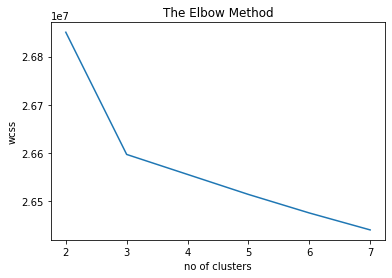

In [ ]:
plt.plot([2,3,5,6,7], wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
k_means_data=pca_df

In [ ]:
list1=[]

kmeans=KMeans(n_clusters=2,init='k-means++',random_state=42)
labels=kmeans.fit_predict(k_means_data.iloc[:,:])



In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
print(silhouette_score(k_means_data,labels))

0.22382680109271252


Now we go for data visualization part.

In [ ]:
pca_final,vari=pca_decomposition(pca_df,3)

pca_components  3    describe  0.02706564896645021


In [ ]:
pca_final.head()

,0,1,2
0,63.009114,4.660543,-6.955160
1,40.858158,3.063584,-4.411502
2,31.477746,11.322189,0.459359
3,37.360194,2.330154,-4.573155
4,30.354010,2.595415,-3.598757


In [ ]:
pca_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57806 entries, 0 to 57805
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       57806 non-null  float64
 1   1       57806 non-null  float64
 2   2       57806 non-null  float64
dtypes: float64(3)
memory usage: 1.3 MB


In [ ]:
pca_final['first_pca']=pca_final[0]
pca_final['second_pca']=pca_final[1]
pca_final['third_pca']=pca_final[2]
pca_final.head()

,0,1,2,first_pca,second_pca,third_pca
0,63.009114,4.660543,-6.955160,63.009114,4.660543,-6.955160
1,40.858158,3.063584,-4.411502,40.858158,3.063584,-4.411502
2,31.477746,11.322189,0.459359,31.477746,11.322189,0.459359
3,37.360194,2.330154,-4.573155,37.360194,2.330154,-4.573155
4,30.354010,2.595415,-3.598757,30.354010,2.595415,-3.598757


In [ ]:
pca_final=pca_final.drop(columns=[0,1,2])

In [ ]:
pca_final.head()

,first_pca,second_pca,third_pca
0,63.009114,4.660543,-6.955160
1,40.858158,3.063584,-4.411502
2,31.477746,11.322189,0.459359
3,37.360194,2.330154,-4.573155
4,30.354010,2.595415,-3.598757


In [ ]:
pca_final['clusters']=labels

In [ ]:
pca_final.head()

,first_pca,second_pca,third_pca,clusters
0,63.009114,4.660543,-6.955160,1
1,40.858158,3.063584,-4.411502,1
2,31.477746,11.322189,0.459359,1
3,37.360194,2.330154,-4.573155,1
4,30.354010,2.595415,-3.598757,1


In [ ]:
pca_final.tail()

,first_pca,second_pca,third_pca,clusters
57801,-1.542807,-0.512692,-2.268954,0
57802,3.725842,-0.984370,-1.325363,1
57803,-1.466996,-1.448596,1.552580,0
57804,-2.513570,-0.042317,-2.454113,0
57805,-2.776208,0.225912,-2.658838,0


In [ ]:
pca_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57806 entries, 0 to 57805
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   first_pca   57806 non-null  float64
 1   second_pca  57806 non-null  float64
 2   third_pca   57806 non-null  float64
 3   clusters    57806 non-null  int32  
dtypes: float64(3), int32(1)
memory usage: 1.5 MB


In [ ]:
from mpl_toolkits.mplot3d import Axes3D

DONE


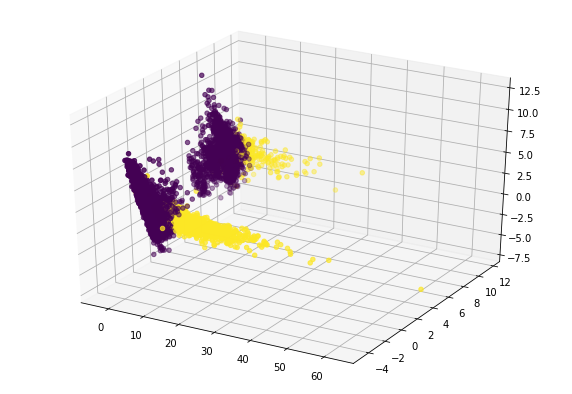

Text(0.08403110811143355, 0.011258033778775397, 'third')

In [ ]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
x=pca_final['first_pca']
y=pca_final['second_pca']
z=pca_final['third_pca']
labels=pca_final['clusters']
print("DONE")
ax.scatter3D(x, y, z,c=labels,marker='o')
plt.show()
ax.set_xlabel('first')
ax.set_ylabel('second')
ax.set_zlabel('third')
 

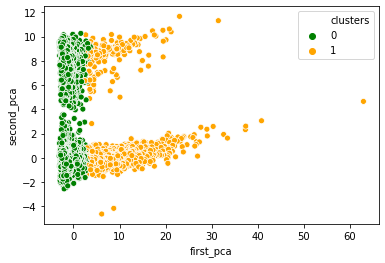

In [ ]:
import seaborn as sns
sns.scatterplot(x=x,y=y,hue=labels,palette=['green','orange'])

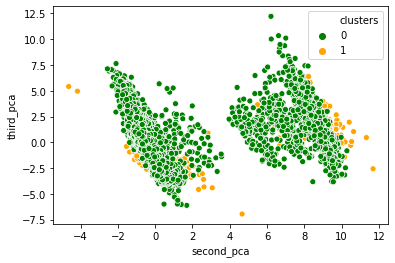

In [ ]:
sns.scatterplot(x=y,y=z,hue=labels,palette=['green','orange'])

In [ ]:
sns.scatterplot(x=x,y=z,hue=labels,palette=['green','orange'])

In [ ]:
train_data['cluster']=labels

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57806 entries, 0 to 57805
Columns: 768 entries, GENDER to cluster
dtypes: float64(5), int32(1), int64(12), uint8(750)
memory usage: 49.1 MB


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57806 entries, 0 to 57805
Columns: 768 entries, GENDER to cluster
dtypes: float64(5), int32(1), int64(12), uint8(750)
memory usage: 49.1 MB


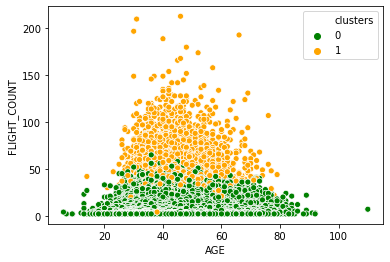

In [ ]:
sns.scatterplot(x=train_data['AGE'],y=train_data['FLIGHT_COUNT'],hue=labels,palette=['green','orange'])

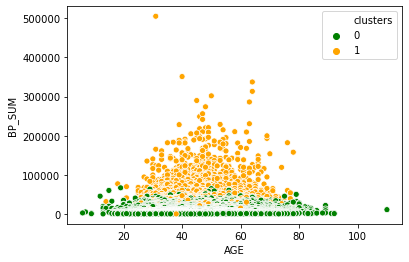

In [ ]:
sns.scatterplot(x=train_data['AGE'],y=train_data['BP_SUM'],hue=labels,palette=['green','orange'])

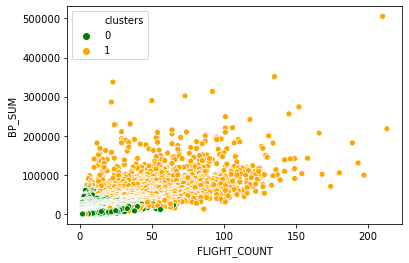

In [ ]:
sns.scatterplot(x=train_data['FLIGHT_COUNT'],y=train_data['BP_SUM'],hue=labels,palette=['green','orange'])

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57806 entries, 0 to 57805
Columns: 768 entries, GENDER to cluster
dtypes: float64(5), int32(1), int64(12), uint8(750)
memory usage: 49.1 MB


In [ ]:
tidy_train=pd.concat([train_data,train_id],axis=1)

In [ ]:
tidy_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57806 entries, 0 to 57805
Columns: 769 entries, GENDER to MEMBER_NO
dtypes: float64(5), int32(1), int64(13), uint8(750)
memory usage: 49.5 MB


In [ ]:
tidy_train.to_csv("Tidy_Train.csv",index=False)

In [ ]:
Train_tidy=pd.read_csv("Tidy_Train.csv")

In [ ]:
Train_tidy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57806 entries, 0 to 57805
Columns: 769 entries, GENDER to MEMBER_NO
dtypes: float64(5), int64(764)
memory usage: 339.1 MB


In [ ]:
train_data["MEMBER_NO"]=train_id

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57806 entries, 0 to 57805
Columns: 769 entries, GENDER to MEMBER_NO
dtypes: float64(5), int32(1), int64(13), uint8(750)
memory usage: 49.5 MB


In [ ]:
Test_tidy=train_data.loc[49818:]

In [ ]:
Test_tidy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7988 entries, 49818 to 57805
Columns: 769 entries, GENDER to MEMBER_NO
dtypes: float64(5), int32(1), int64(13), uint8(750)
memory usage: 6.8 MB


In [ ]:
Test_tidy.head()

,GENDER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,...,WORK_PROVINCE_zhuhai,WORK_PROVINCE_——,WORK_PROVINCE_,WORK_PROVINCE_,WORK_PROVINCE_。,WORK_PROVINCE_shanxian,WORK_PROVINCE_－,WORK_PROVINCE_．,cluster,MEMBER_NO
49818,1,36.0,4,1252,1320.0,0.0,4717,428,40.0,88,...,0,0,0,0,0,0,0,0,0,37255
49819,1,35.0,3,769,1641.0,295.0,5710,308,180.5,359,...,0,0,0,0,0,0,0,0,0,21899
49820,1,49.0,4,1543,618.0,1348.0,5530,353,53.0,137,...,0,0,0,0,0,0,0,0,0,12774
49821,1,38.0,2,1333,1446.0,380.0,4048,273,127.0,127,...,0,0,0,0,0,0,0,0,0,43517
49822,1,34.0,2,1120,0.0,1688.0,3380,120,3.0,3,...,0,0,0,0,0,0,0,0,0,55893


In [ ]:
Test_tidy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7988 entries, 49818 to 57805
Columns: 769 entries, GENDER to MEMBER_NO
dtypes: float64(5), int32(1), int64(13), uint8(750)
memory usage: 6.8 MB


In [ ]:
result=Test_tidy[["MEMBER_NO","cluster"]]

In [ ]:
result.head()

,MEMBER_NO,cluster
49818,37255,0
49819,21899,0
49820,12774,0
49821,43517,0
49822,55893,0


In [ ]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7988 entries, 49818 to 57805
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   MEMBER_NO  7988 non-null   int64
 1   cluster    7988 non-null   int32
dtypes: int32(1), int64(1)
memory usage: 93.7 KB


In [ ]:
result['cluster'].unique()

array([0, 1], dtype=int32)

In [ ]:
result.to_csv("Final_result.csv")